## Visualizing Attributes of Parole Violators

In the crime lecture, we saw how we can use heatmaps to give a 2-dimensional representation of 3-dimensional data: we made heatmaps of crime counts by time of the day and day of the week. In this problem, we'll learn how to use histograms to show counts by one variable, and then how to visualize 3 dimensions by creating multiple histograms.

We'll use the parole data parole.csv from Unit 3. Before, we used this data to predict parole violators. Now, let's try to get a little more insight into this dataset using histograms. As a reminder, the variables in this dataset are:

**male** = 1 if the parolee is male, 0 if female

**race** = 1 if the parolee is white, 2 otherwise

**age** = the parolee's age in years at the time of release from prison

**state** = a code for the parolee's state. 2 is Kentucky, 3 is Louisiana, 4 is Virginia, and 1 is any other state. These three states were selected due to having a high representation in the dataset.

**time.served** = the number of months the parolee served in prison (limited by the inclusion criteria to not exceed 6 months).

**max.sentence** = the maximum sentence length for all charges, in months (limited by the inclusion criteria to not exceed 18 months).

**multiple.offenses** = 1 if the parolee was incarcerated for multiple offenses, 0 otherwise.

**crime** = a code for the parolee's main crime leading to incarceration. 2 is larceny, 3 is drug-related crime, 4 is driving-related crime, and 1 is any other crime.

**violator** = 1 if the parolee violated the parole, and 0 if the parolee completed the parole without violation.

### Loading the Data

In [1]:
parole = read.csv("./dataset/parole.csv")

In [2]:
parole$male = as.factor(parole$male)
parole$state = as.factor(parole$state)
parole$crime = as.factor(parole$crime)

In [3]:
summary(parole)

 male         race            age        state    time.served   
 0:130   Min.   :1.000   Min.   :18.40   1:143   Min.   :0.000  
 1:545   1st Qu.:1.000   1st Qu.:25.35   2:120   1st Qu.:3.250  
         Median :1.000   Median :33.70   3: 82   Median :4.400  
         Mean   :1.424   Mean   :34.51   4:330   Mean   :4.198  
         3rd Qu.:2.000   3rd Qu.:42.55           3rd Qu.:5.200  
         Max.   :2.000   Max.   :67.00           Max.   :6.000  
  max.sentence   multiple.offenses crime      violator     
 Min.   : 1.00   Min.   :0.0000    1:315   Min.   :0.0000  
 1st Qu.:12.00   1st Qu.:0.0000    2:106   1st Qu.:0.0000  
 Median :12.00   Median :1.0000    3:153   Median :0.0000  
 Mean   :13.06   Mean   :0.5363    4:101   Mean   :0.1156  
 3rd Qu.:15.00   3rd Qu.:1.0000            3rd Qu.:0.0000  
 Max.   :18.00   Max.   :1.0000            Max.   :1.0000  

In [5]:
table(parole$male, parole$violator)

   
      0   1
  0 116  14
  1 481  64

In [7]:
14 / 78

[1] 0.1794872

In [8]:
kentukey = subset(parole, state == 2)

In [9]:
table(kentukey$crime)


 1  2  3  4 
42 10 64  4 

### Creating a Basic Histogram

Recall from lecture that in ggplot, we need to specify the dataset, the aesthetic, and the geometry. To create a histogram, the geometry will be geom_histogram. The data we'll use is parole, and the aesthetic will be the map from a variable to the x-axis of the histogram.

Create a histogram to find out the distribution of the age of parolees, by typing the following command in your R console (you might need to load the ggplot2 package first by typing library(ggplot2) in your R console):
```R
ggplot(data = parole, aes(x = age)) + geom_histogram(binwidth = 5, boundary = 0, color = 'black', fill = 'cornflowerblue')
```

In [10]:
library(ggplot2)

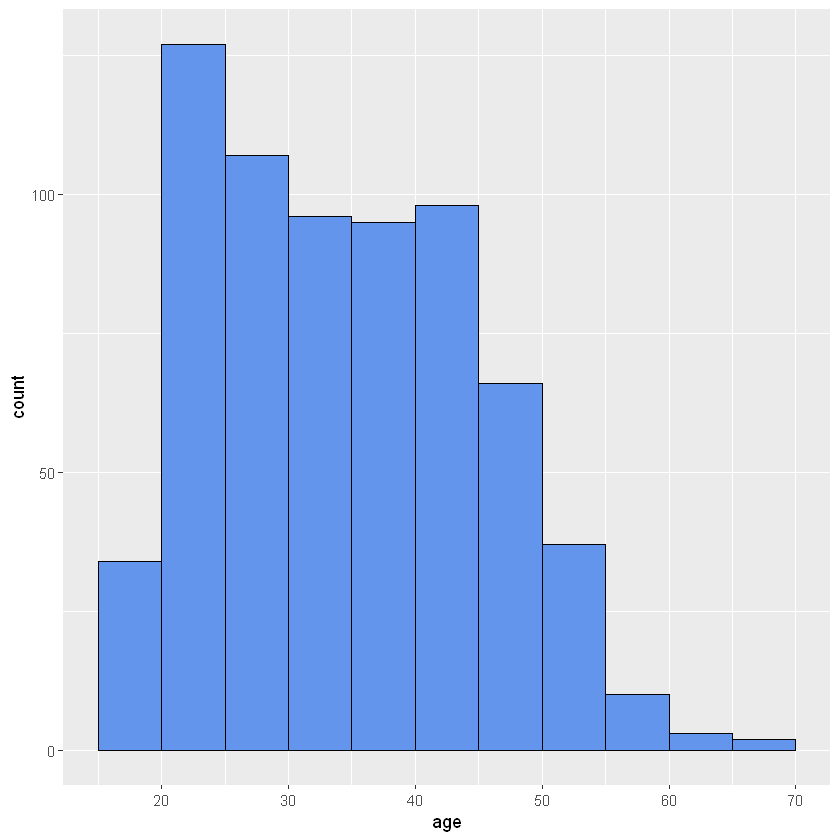

In [11]:
ggplot(data = parole, aes(x = age)) + 
geom_histogram(binwidth = 5, boundary = 0, color = 'black', fill = 'cornflowerblue')

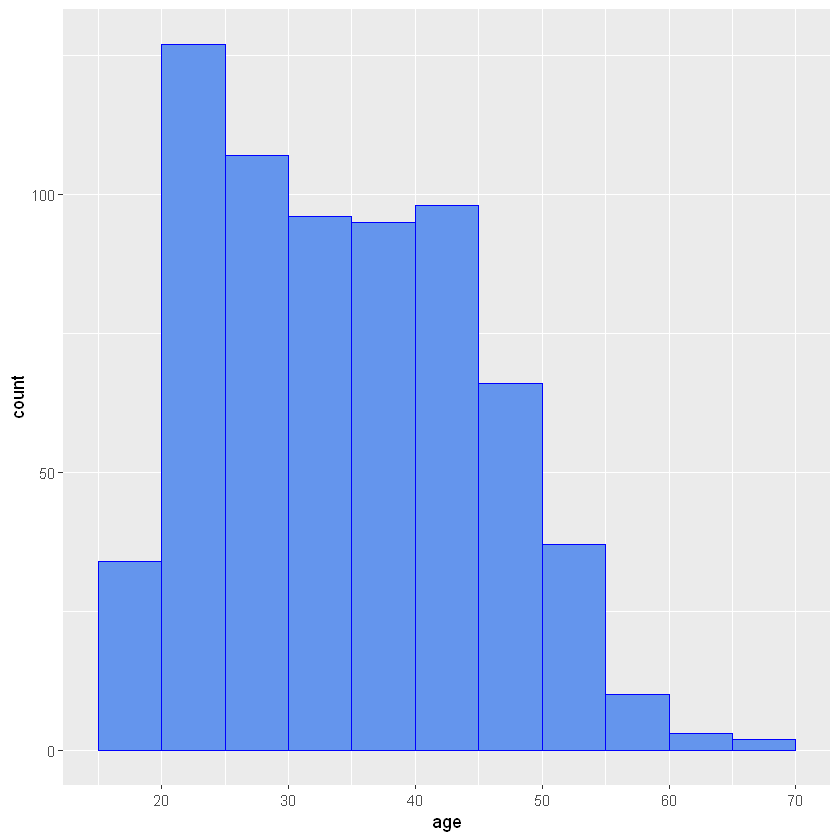

In [13]:
ggplot(data = parole, aes(x = age)) + 
geom_histogram(binwidth = 5, boundary = 0, color = 'blue', fill = 'cornflowerblue')

### Adding Another Dimension

Now suppose we are interested in seeing how the age distribution of male parolees compares to the age distribution of female parolees.

One option would be to create a heatmap with age on one axis and male (a binary variable in our data set) on the other axis. Another option would be to stick with histograms, but to create a separate histogram for each gender. ggplot has the ability to do this automatically using the facet_grid command.

To create separate histograms for male and female, type the following command into your R console:
```R
ggplot(data = parole, aes(x = age)) + geom_histogram(binwidth = 5, boundary = 0) + facet_grid(male ~ .)
```
The histogram for female parolees is shown at the top, and the histogram for male parolees is shown at the bottom.

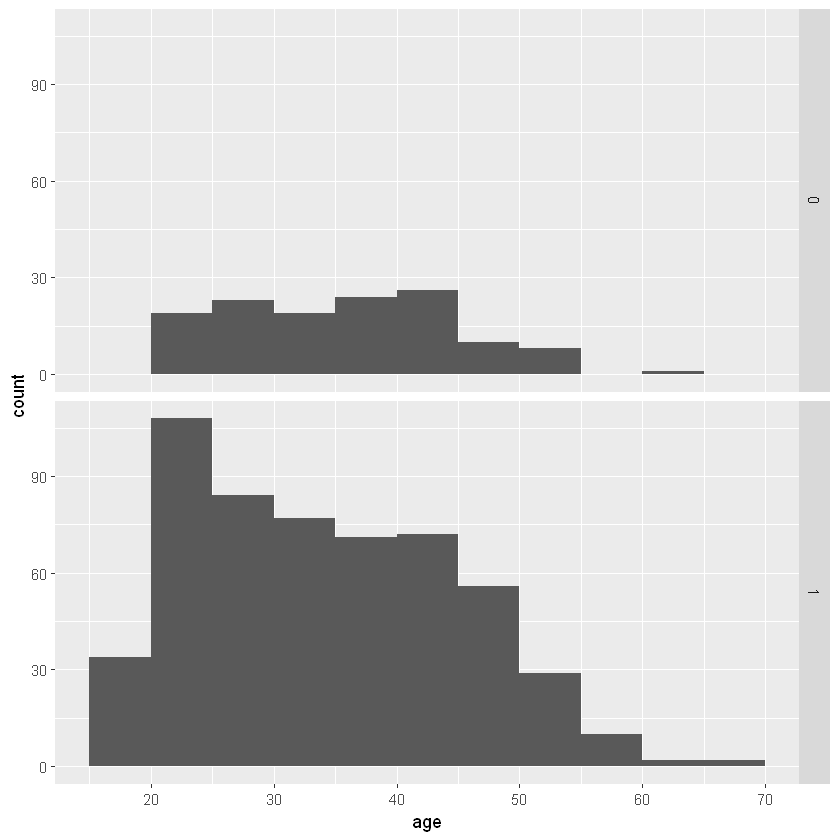

In [14]:
ggplot(data = parole, aes(x = age)) + geom_histogram(binwidth = 5, boundary = 0) + facet_grid(male ~ .)

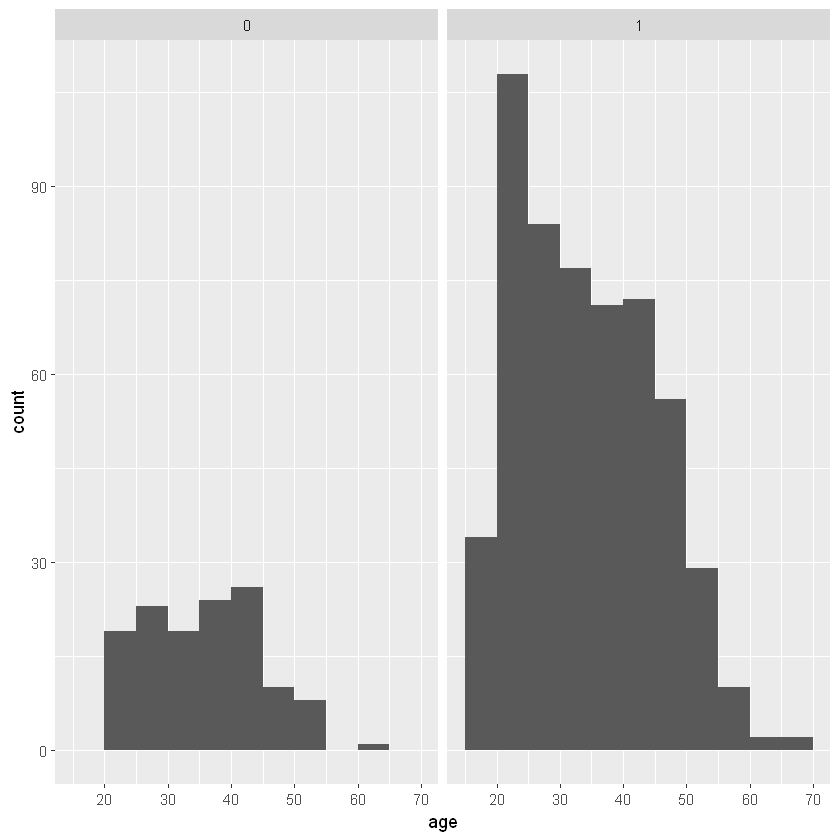

In [15]:
ggplot(data = parole, aes(x = age)) + geom_histogram(binwidth = 5, boundary = 0) + facet_grid(. ~ male)

An alternative to faceting is to simply color the different groups differently. To color the data points by group, we need to tell ggplot that a property of the data (male or not male) should be translated to an aesthetic property of the histogram. We can do this by setting the fill parameter within the aesthetic to male.

Run the following command in your R console to produce a histogram where data points are colored by group:
```R
ggplot(data = parole, aes(x = age, fill = male)) + geom_histogram(binwidth = 5, boundary = 0)
```
Since we didn't specify colors to use, ggplot will use its default color selection. Let's change this by defining our own color palette. First, type in your R console:
```R
colorPalette = c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
```
This is actually a colorblind-friendly palette, desribed on this Cookbook for R page . Now, generate your histogram again, using colorPalette, with the following command:
```R
ggplot(data = parole, aes(x = age, fill = male)) + geom_histogram(binwidth = 5, boundary = 0) + scale_fill_manual(values=colorPalette)
```

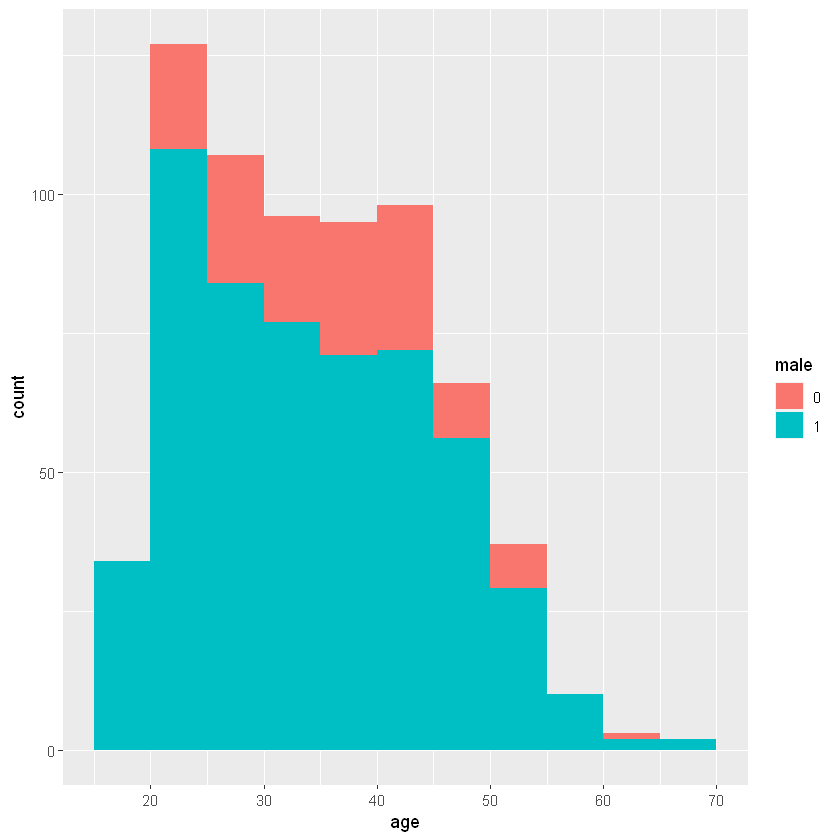

In [16]:
ggplot(data = parole, aes(x = age, fill = male)) + geom_histogram(binwidth = 5, boundary = 0)

In [17]:
colorPalette = c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

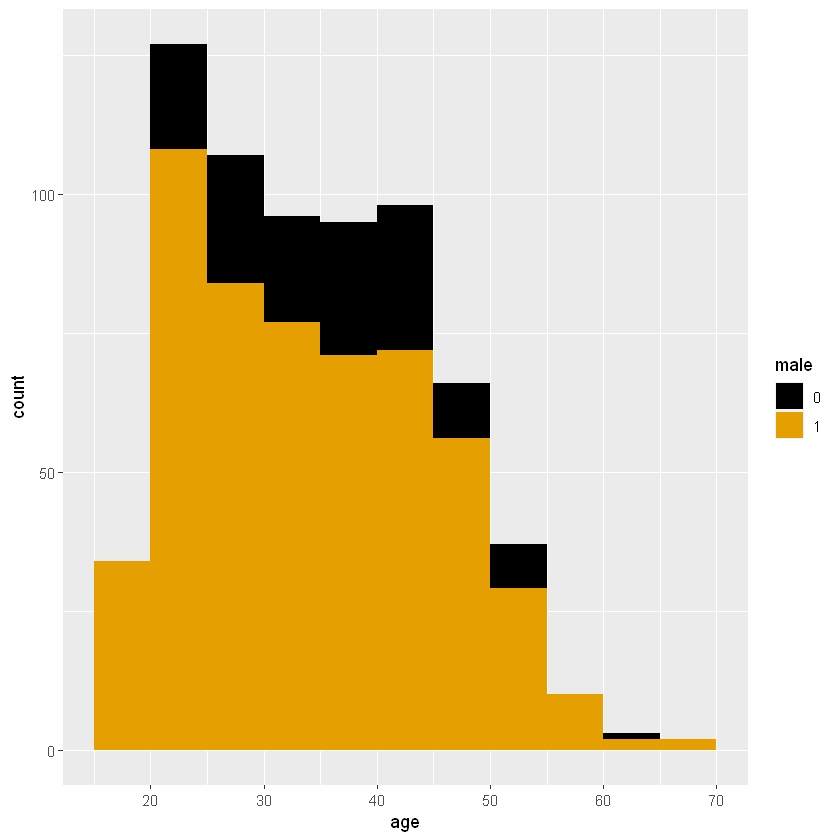

In [18]:
ggplot(data = parole, aes(x = age, fill = male)) + 
geom_histogram(binwidth = 5, boundary = 0) + 
scale_fill_manual(values=colorPalette)

Coloring the groups differently is a good way to see the breakdown of age by sex within the single, aggregated histogram. However, the bars here are stacked, meaning that the height of the orange bars in each age bin represents the total number of parolees in that age bin, not just the number of parolees in that group.

An alternative to a single, stacked histogram is to create two histograms and overlay them on top of each other. This is a simple adjustment to our previous command.

We just need to:

1) Tell ggplot not to stack the histograms by adding the argument position="identity" to the geom_histogram function.

2) Make the bars semi-transparent so we can see both colors by adding the argument alpha=0.5 to the geom_histogram function.

Redo the plot, making both of these changes.

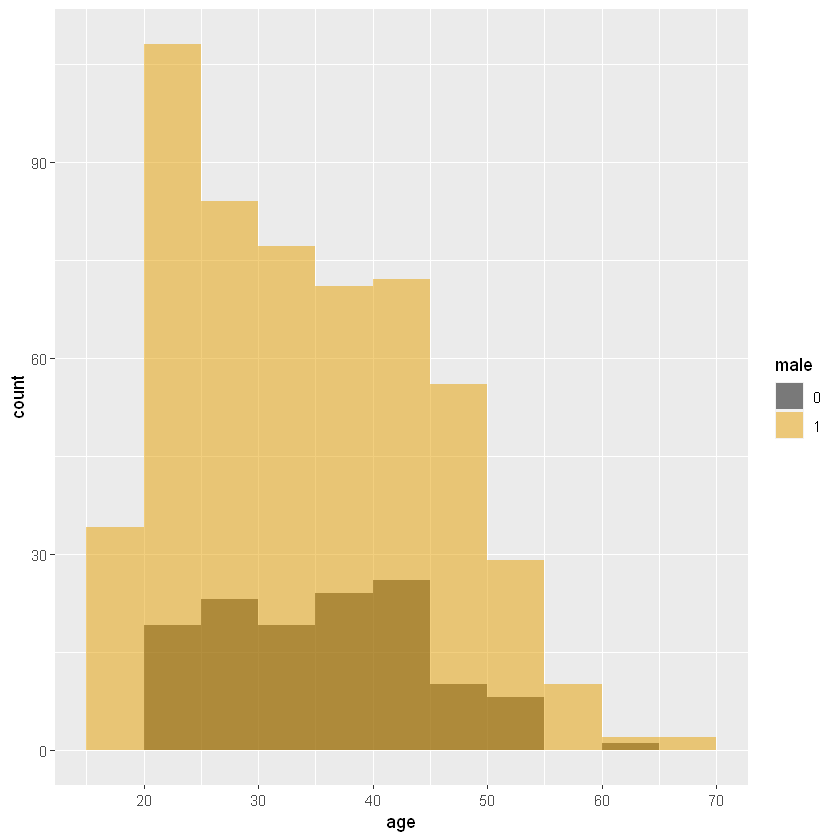

In [19]:
ggplot(data = parole, aes(x = age, fill = male)) + 
geom_histogram(binwidth = 5, boundary = 0, position='identity', alpha=0.5) + 
scale_fill_manual(values=colorPalette)

### Time Served

Now let's explore another aspect of the data: the amount of time served by parolees. Create a basic histogram like the one we created in Problem 2, but this time with time.served on the x-axis. Set the bin width to one month.

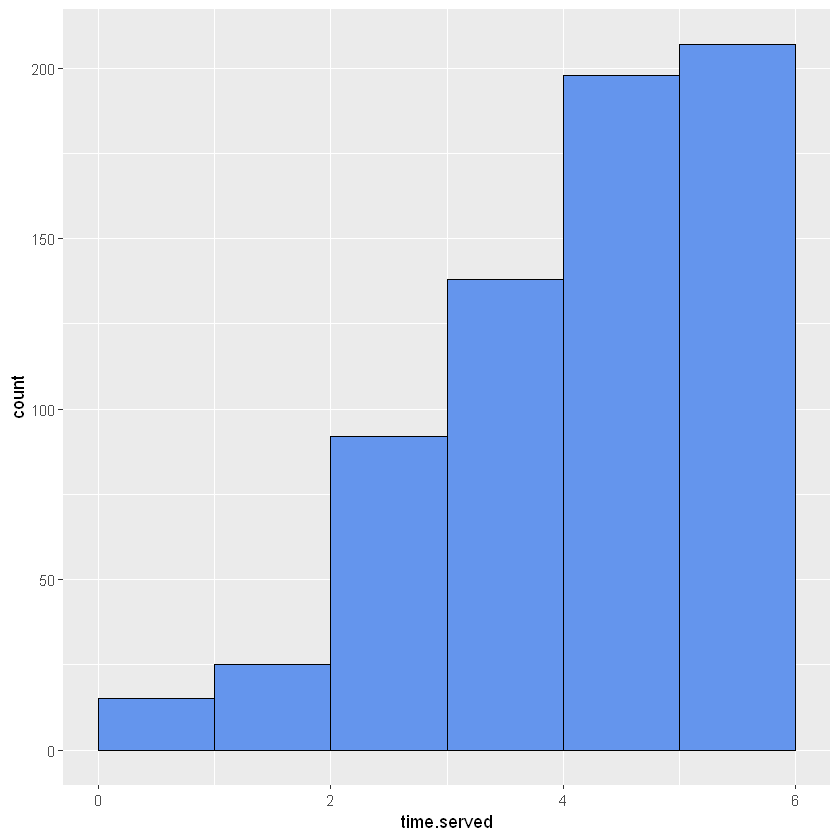

In [20]:
ggplot(data = parole, aes(x = time.served)) + 
geom_histogram(binwidth = 1, boundary = 0, color = 'black', fill = 'cornflowerblue')

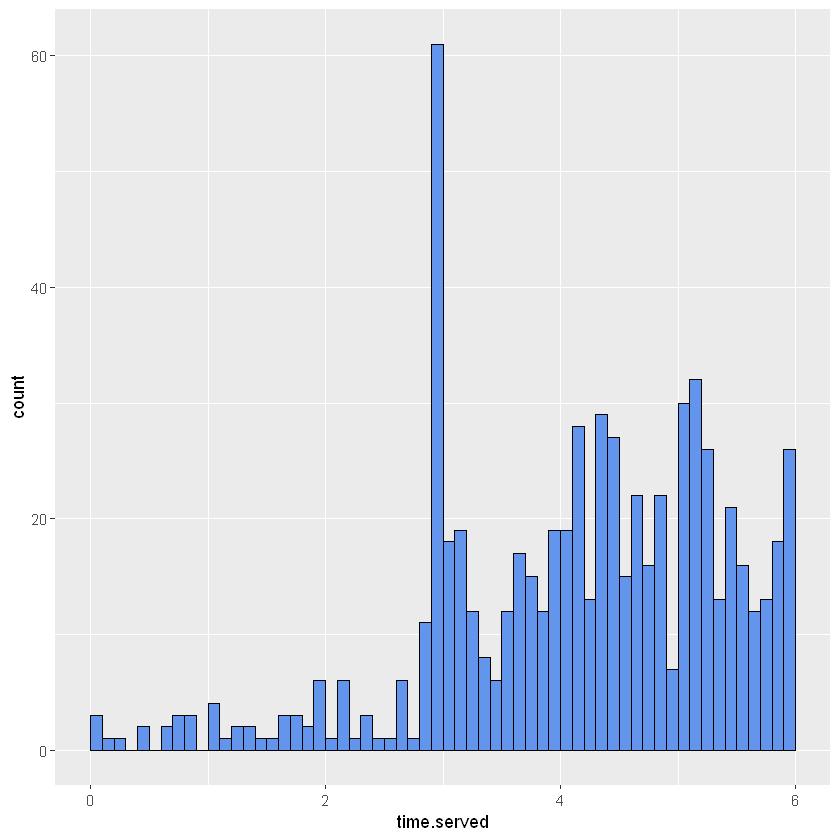

In [21]:
ggplot(data = parole, aes(x = time.served)) + 
geom_histogram(binwidth = .1, boundary = 0, color = 'black', fill = 'cornflowerblue')

Now, suppose we suspect that it is unlikely that each type of crime has the same distribution of time served. To visualize this, change the binwidth back to 1 month, and use facet_grid to create a separate histogram of time.served for each value of the variable crime.

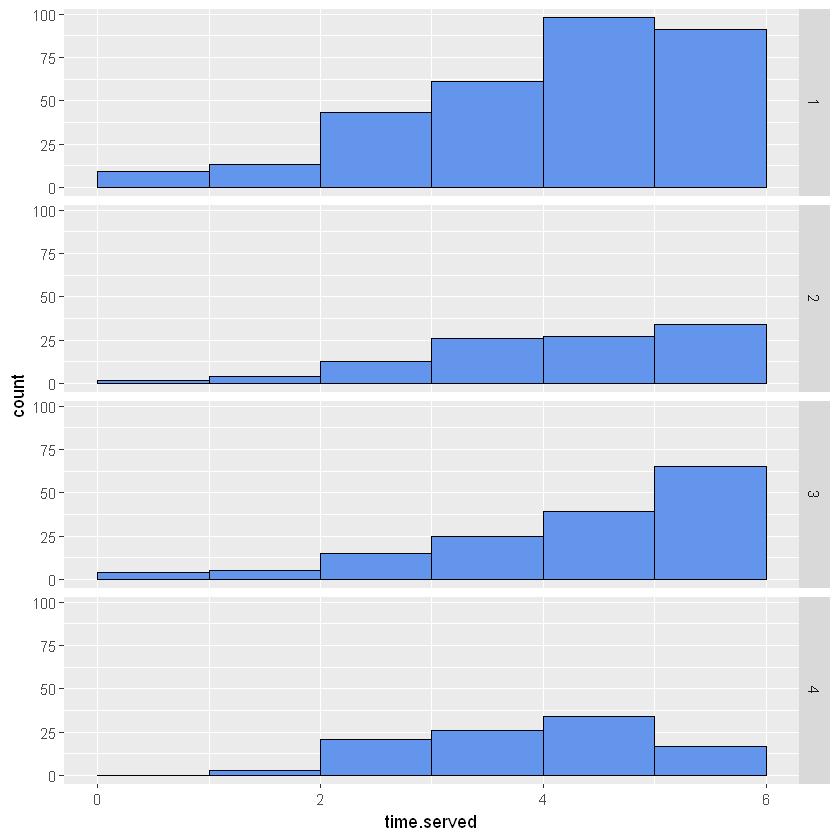

In [23]:
ggplot(data = parole, aes(x = time.served)) + 
geom_histogram(binwidth = 1, boundary = 0, color = 'black', fill = 'cornflowerblue') +
facet_grid(crime ~ .)

Now, instead of faceting the histograms, overlay them. Remember to set the position and alpha parameters so that the histograms are not stacked. Also, make sure to indicate that the fill aesthetic should be "crime".

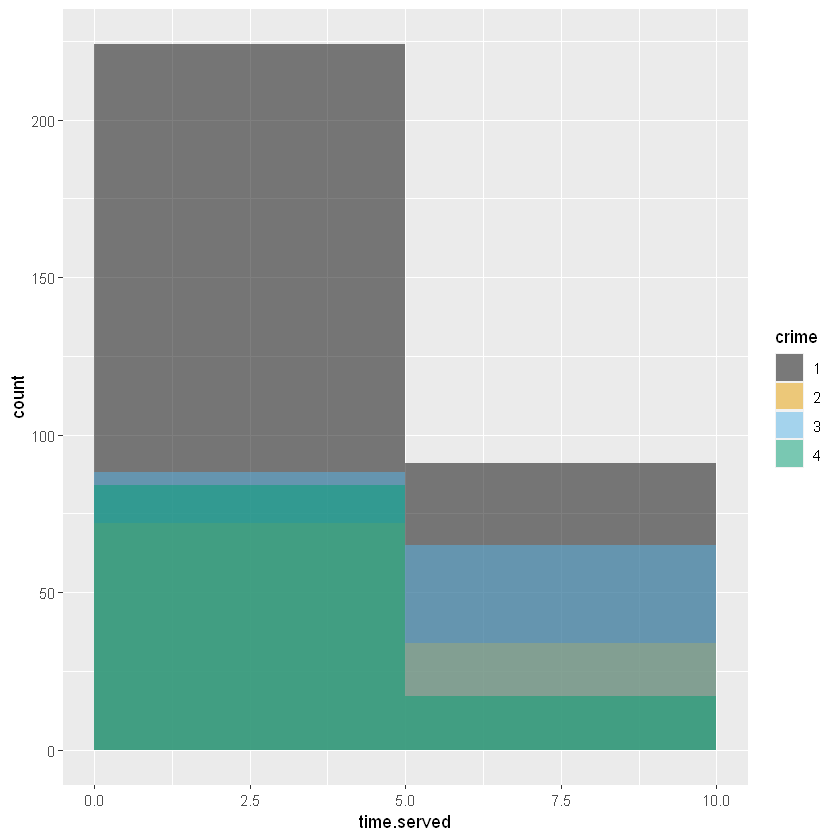

In [24]:
ggplot(data = parole, aes(x = time.served, fill = crime)) + 
geom_histogram(binwidth = 5, boundary = 0, position='identity', alpha=0.5) + 
scale_fill_manual(values=colorPalette)